In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [2]:
data= pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
pd.set_option('display.max_rows',500)

In [5]:
pd.set_option('display.max_columns',500)

In [6]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### here is the order in which we will develop this model

1. Data understanding
2. Data cleaning
3. EDA (univariable, bi-variable, multivariable)
4. Dunny variable creation
5. Spliting data for test and train
6. RFE
7. Model building
8. Svaluating model

In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
for i in data:
    print(data[i].value_counts(dropna=False))
    print("-"*50)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--

In [11]:
for i in data:
    print(i)
    print(data[i].nunique())
    print("-"*50)

Prospect ID
9240
--------------------------------------------------
Lead Number
9240
--------------------------------------------------
Lead Origin
5
--------------------------------------------------
Lead Source
21
--------------------------------------------------
Do Not Email
2
--------------------------------------------------
Do Not Call
2
--------------------------------------------------
Converted
2
--------------------------------------------------
TotalVisits
41
--------------------------------------------------
Total Time Spent on Website
1731
--------------------------------------------------
Page Views Per Visit
114
--------------------------------------------------
Last Activity
17
--------------------------------------------------
Country
38
--------------------------------------------------
Specialization
19
--------------------------------------------------
How did you hear about X Education
10
--------------------------------------------------
What is your current occu

### we can see prospect ID and Lead number has unique values so we can drop them.

In [12]:
data=data.drop(columns=["Prospect ID","Lead Number"],axis =1)

In [13]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Before dealing with null values lets replace the term select with np.NaN

In [14]:
data=data.replace("Select",np.NaN)

In [15]:
data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### it looks like there are some colums with more than 30 percent missing data, so we will drop them.

In [16]:
missing_data=data.isnull().mean()>0.3

In [17]:
missing_data[missing_data==True]

Specialization                        True
How did you hear about X Education    True
Tags                                  True
Lead Quality                          True
Lead Profile                          True
City                                  True
Asymmetrique Activity Index           True
Asymmetrique Profile Index            True
Asymmetrique Activity Score           True
Asymmetrique Profile Score            True
dtype: bool

In [18]:
data.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [19]:
col_to_drop=missing_data[missing_data==True].keys()

In [20]:
col_to_drop

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [21]:
data=data.drop(columns=col_to_drop, axis=1)

In [22]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### We have dropped the columns which has more than 30 percent data missing lets deal with other missing values and also data cleaning

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [24]:
data.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

### we are doing two type of treatment 
1. where percent is more we will add new category for missing data and remaining we will inpute values

In [25]:
for x in data:
    print(data[x].value_counts(dropna=False))
    print("-"*75)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
---------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
---------------------------------------------------------------------------
Do Not Email
No     8506
Yes     734
Nam

### While dealing missing values we will also fix values like correcting data in each columns

In [26]:
data["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [27]:
#we learn blog home and we learn looks like same so we will change all to WeLearn
data["Lead Source"]=data["Lead Source"].replace("welearnblog_Home","WeLearn")

In [28]:
# we will reaplace Na for lead score with mode
mode=data["Lead Source"].mode()
data["Lead Source"]=data["Lead Source"].fillna(mode[0])

In [29]:
data["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [30]:
# for TotalVisits we will fill NA with mean
fill=data["TotalVisits"].mean()
data["TotalVisits"]=data["TotalVisits"].fillna(fill)

In [31]:
data["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [32]:
# for Page Views Per Visit we will fill NA with mean
fill=data["Page Views Per Visit"].mean()
data["Page Views Per Visit"]=data["Page Views Per Visit"].fillna(fill)

In [33]:
data["Page Views Per Visit"].value_counts(dropna=False)

Page Views Per Visit
0.00000     2189
2.00000     1795
3.00000     1196
4.00000      896
1.00000      651
5.00000      517
1.50000      306
6.00000      244
2.50000      241
2.36282      137
7.00000      133
3.50000       94
8.00000       86
1.33000       66
1.67000       60
2.33000       59
2.67000       54
9.00000       45
4.50000       43
1.75000       28
3.33000       27
10.00000      25
1.25000       23
5.50000       21
2.25000       19
11.00000      18
3.67000       16
6.50000       13
1.80000       13
2.75000       12
1.40000       11
4.33000        9
14.00000       9
2.80000        9
2.20000        9
1.60000        8
2.17000        8
3.25000        8
2.40000        6
13.00000       6
1.20000        5
12.00000       5
1.43000        4
3.40000        4
2.60000        4
1.71000        4
1.83000        4
15.00000       4
1.38000        3
4.25000        3
4.75000        3
1.57000        3
16.00000       3
5.67000        3
1.78000        3
1.56000        2
5.40000        2
2.71000   

In [34]:
data["Last Activity"].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [35]:
# we will reaplace Na for Last Activity with mode
mode=data["Last Activity"].mode()
data["Last Activity"]=data["Last Activity"].fillna(mode[0])

### we know next three columns has missing values percent tage as around 26%

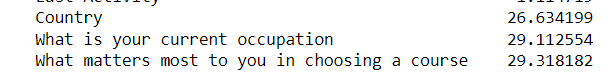

we will see the values and we will try to add new category or lets drop if this info is not going to help much

In [36]:
data["Country"].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [37]:
# there are more Na we will replace it as not provided.
data["Country"]=data["Country"].fillna("Not provided")

In [38]:
data["What is your current occupation"].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [39]:
# there are more Na we will replace it as not provided.
data["What is your current occupation"]=data["What is your current occupation"].fillna("Not provided")

In [40]:
# there are more Na we will replace it as not provided.
data["What matters most to you in choosing a course"]=data["What matters most to you in choosing a course"].fillna("Not provided")

In [41]:
# there are some columns where the data is same like all rows has same info lets check those:
Var_with_one_value=data[["Magazine","Receive More Updates About Our Courses", "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]]

In [42]:
for i in Var_with_one_value:
    print(Var_with_one_value[i].value_counts())
    print("-"*100)

Magazine
No    9240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Get updates on DM Content
No    9240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [43]:
#no use of having these varialbes so we can drop

data=data.drop(columns=Var_with_one_value, axis=1)

In [44]:
data.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

In [45]:
data.shape

(9240, 20)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [47]:
# lets cross check data types to make sure the data is ready for EDA
for x in data:
    print(x)
    print(data[x].describe())
    print("_"*100)
    print(data[x].unique())
    print("*"*100)

Lead Origin
count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object
____________________________________________________________________________________________________
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
****************************************************************************************************
Lead Source
count       9240
unique        20
top       Google
freq        2904
Name: Lead Source, dtype: object
____________________________________________________________________________________________________
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'youtubechannel' 'testone' 'Press_Release' 'NC_EDM']
********************************************************

### data cleaning is completed now lets do EDA 

In [48]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [49]:
#lets create continues variable group and categoricalvariable group
cont_var = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
cat_var = ["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","What is your current occupation","What matters most to you in choosing a course","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview","Last Notable Activity"]

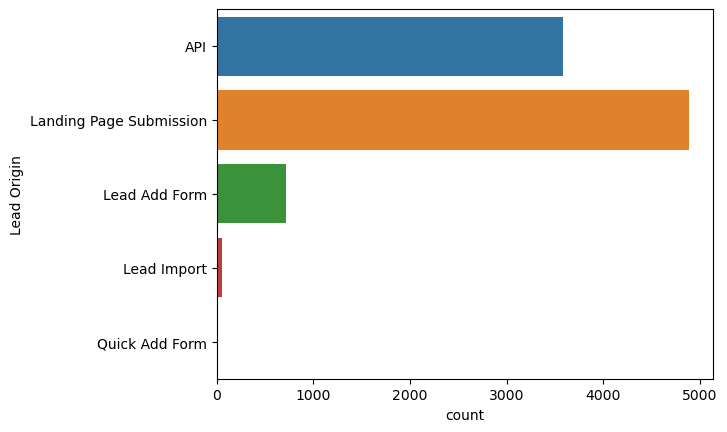

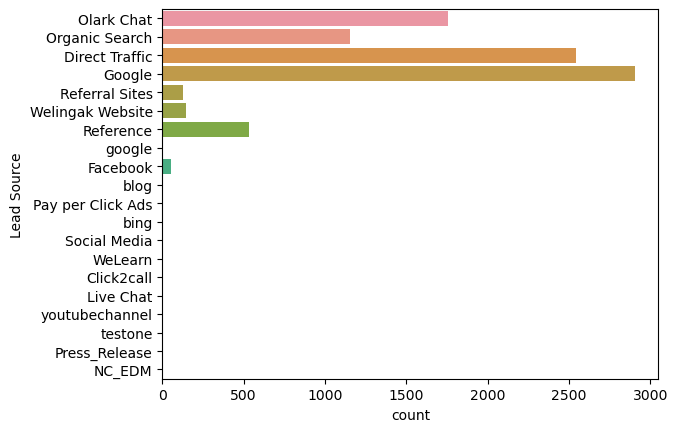

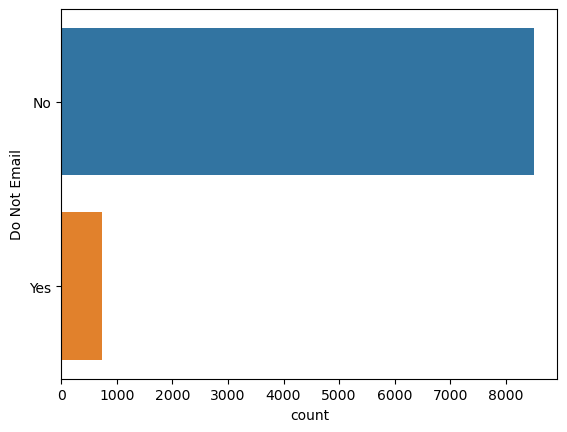

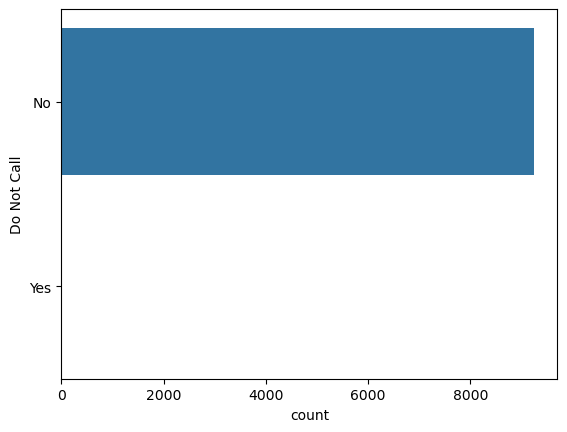

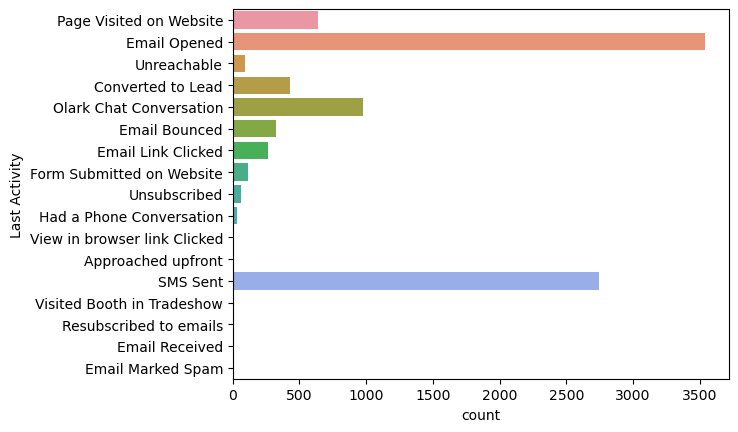

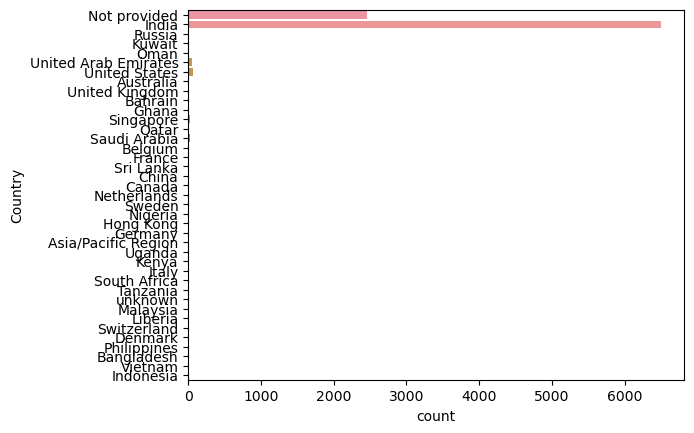

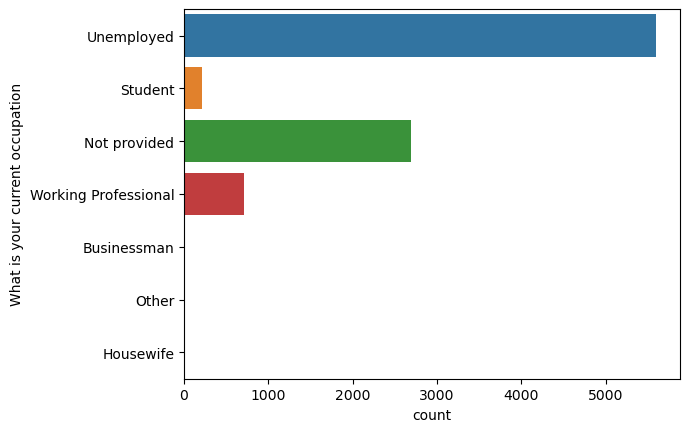

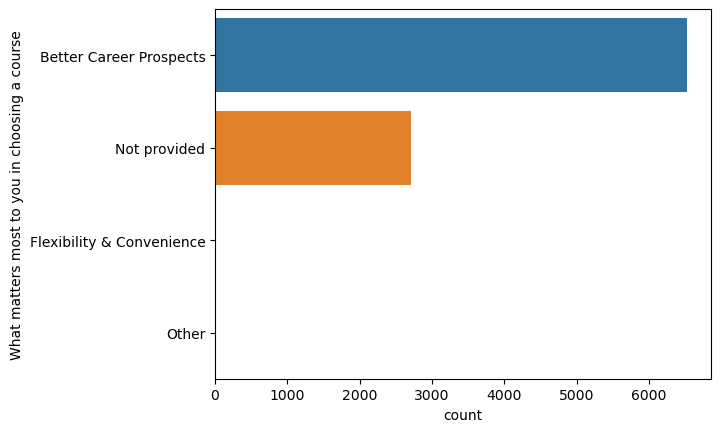

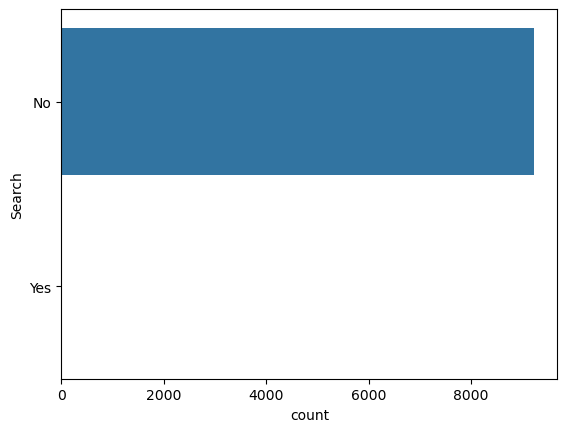

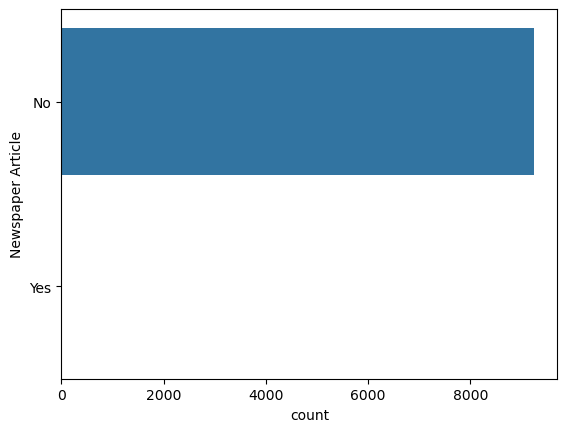

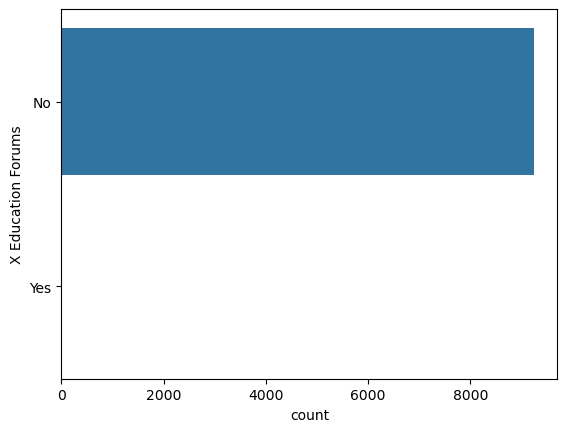

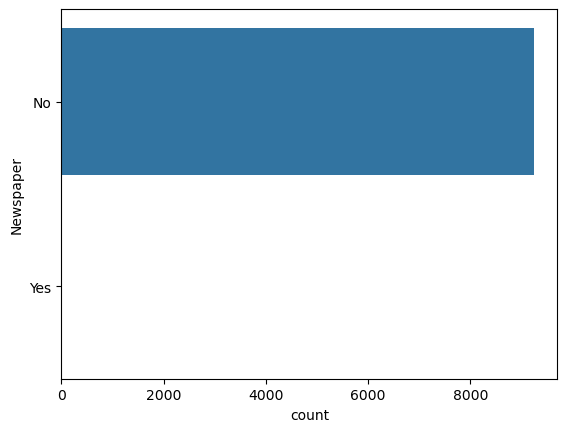

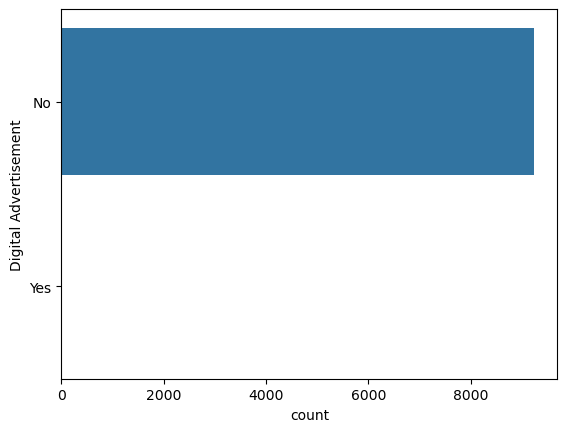

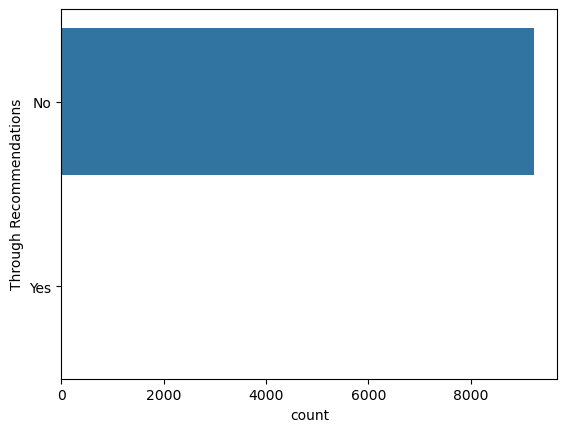

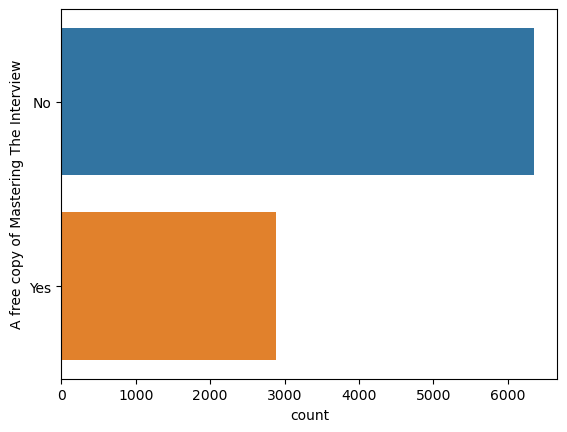

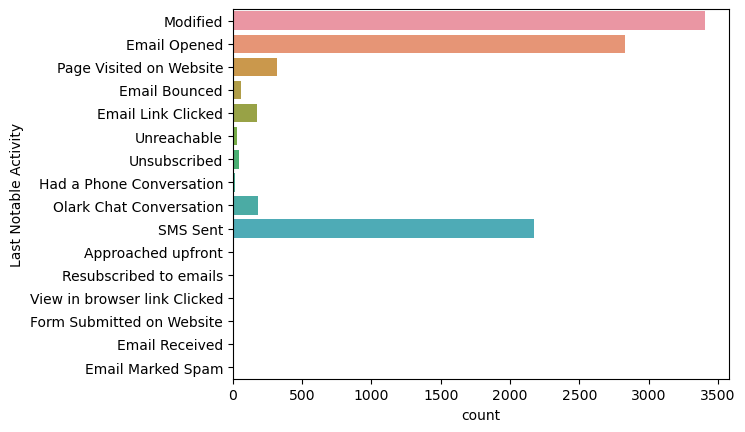

In [50]:
# categorical variable count plot
for i in cat_var:
    sns.countplot(data=data, y= i)
    plt.show()

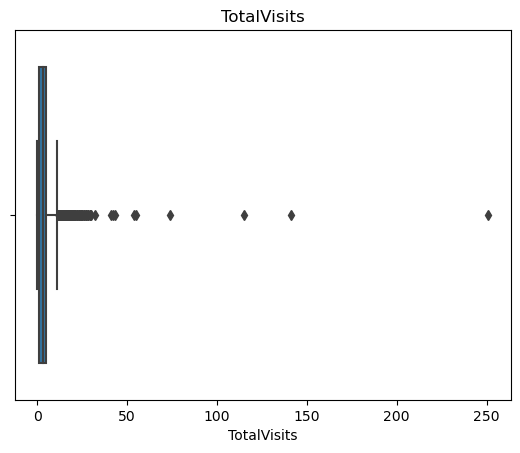

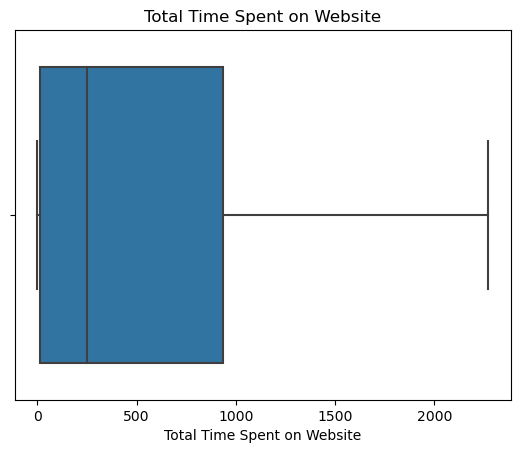

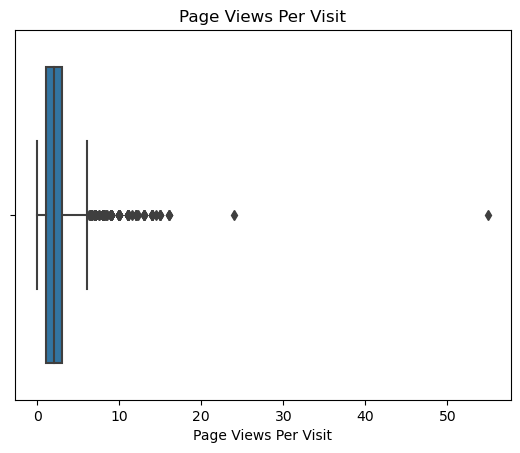

In [51]:
#continues variable box plot
for i in cont_var:
    sns.boxplot(data=data, x=i)
    plt.title(i)
    plt.show()

### there are some outliers but while scaling it will be managed 

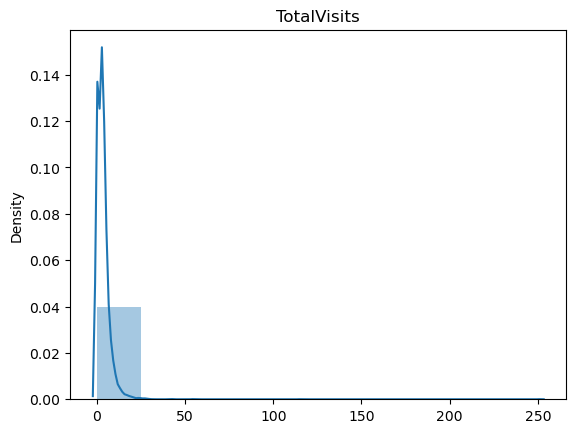

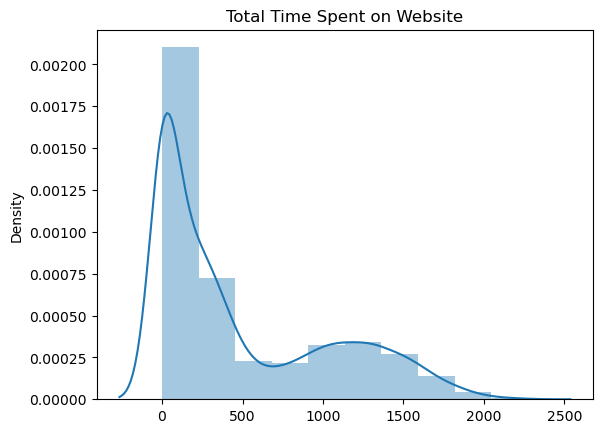

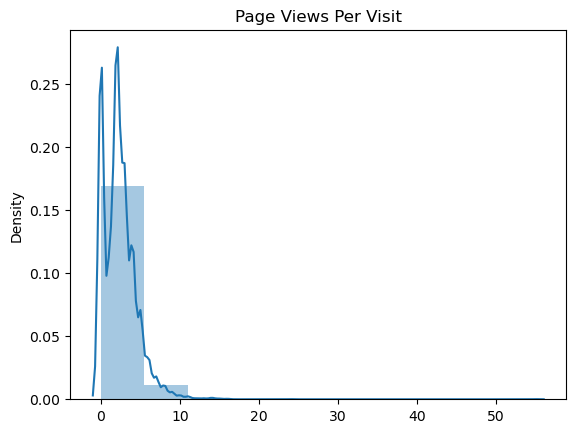

In [52]:
#continues variable distplot
for i in cont_var:
    sns.distplot( x= data[i], bins=10)
    plt.title(i)
    plt.show()

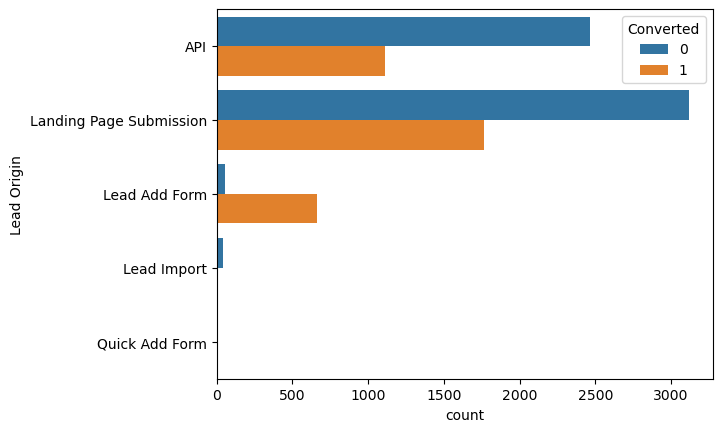

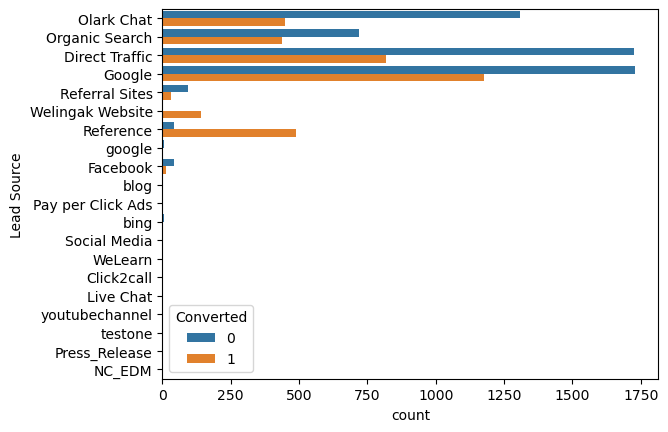

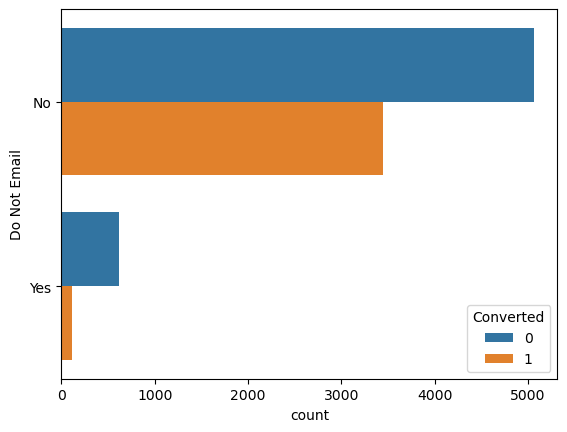

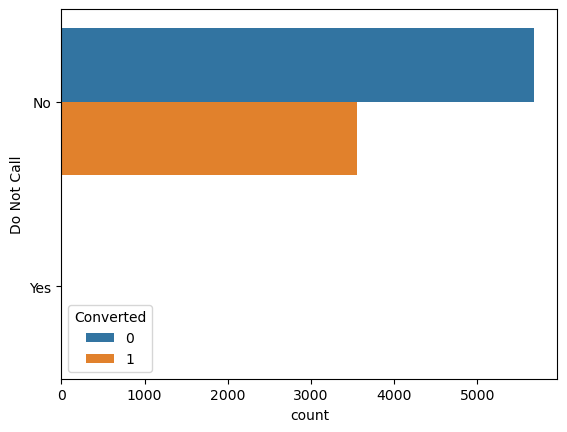

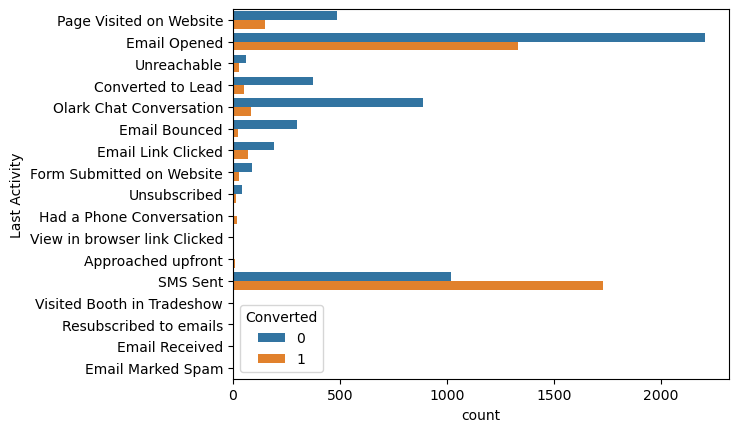

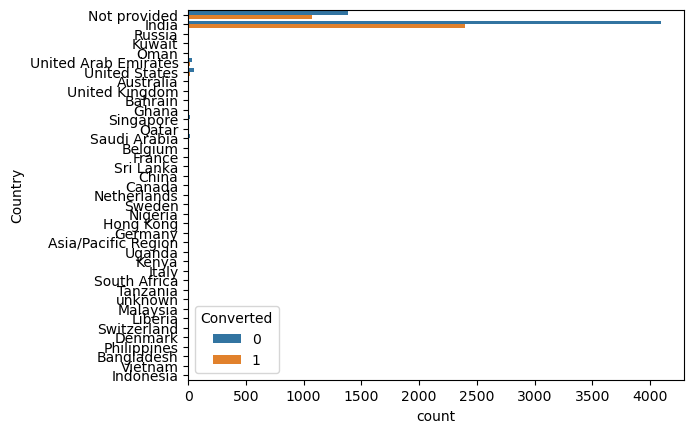

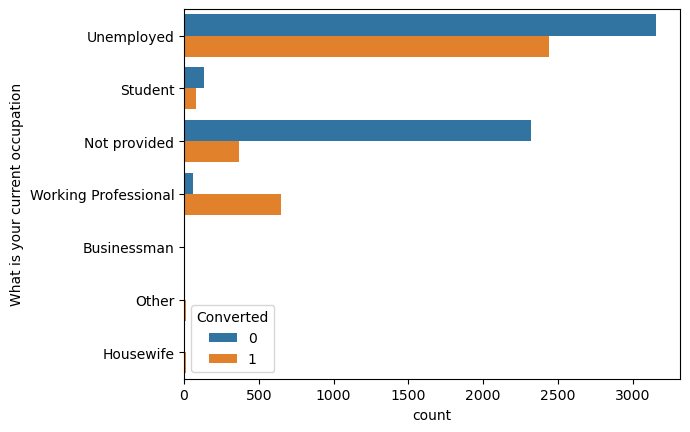

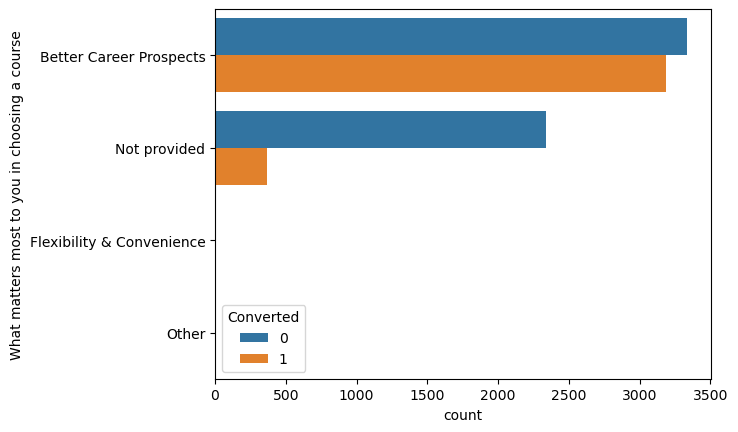

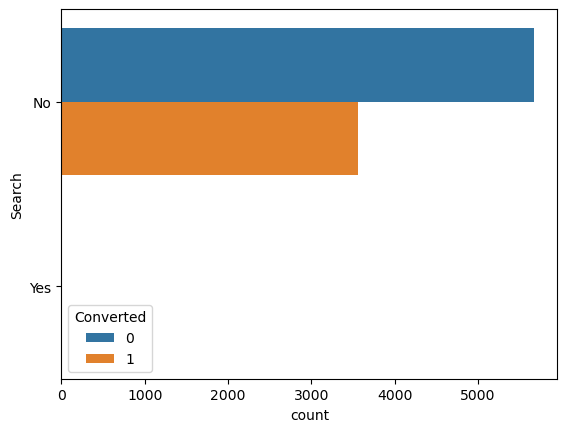

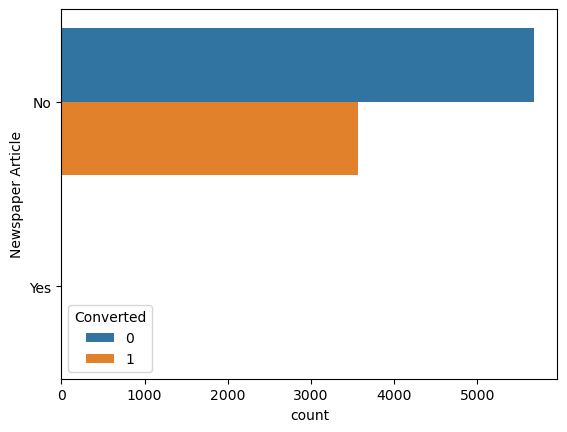

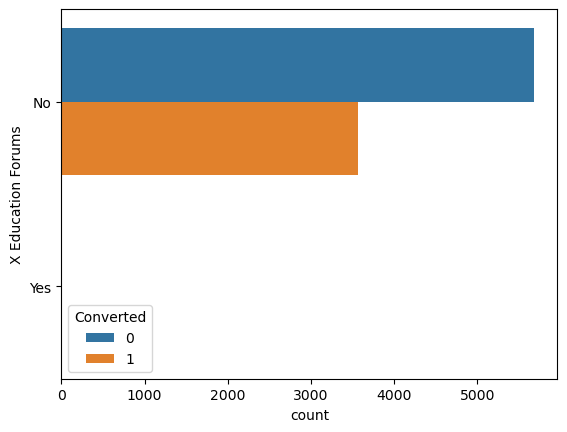

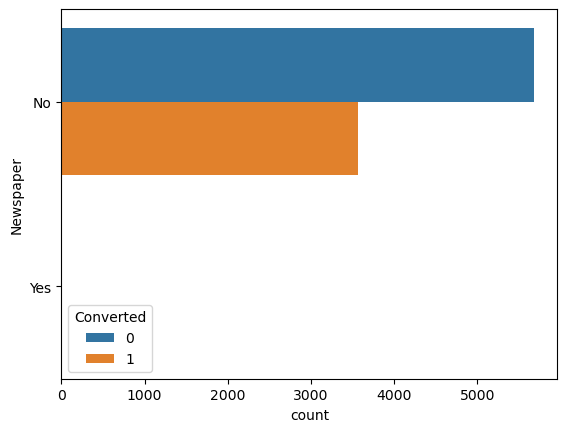

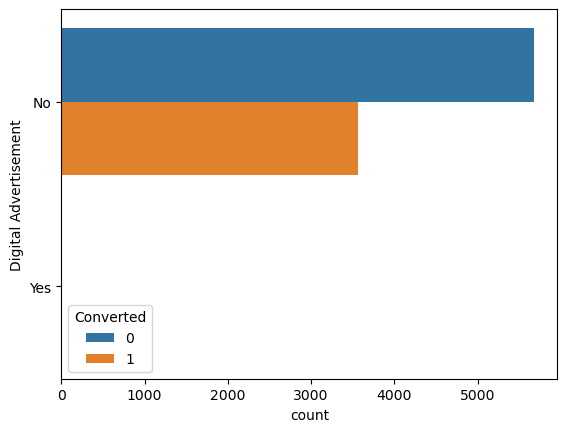

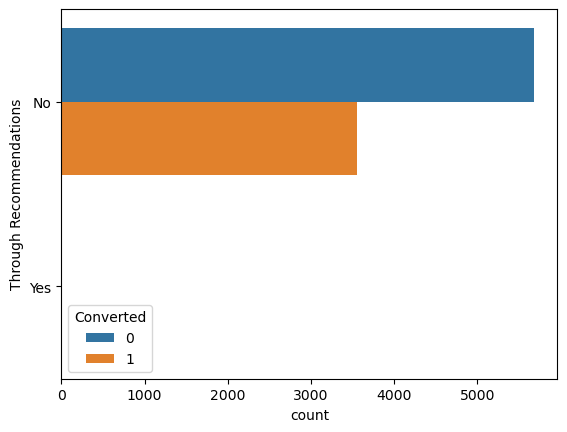

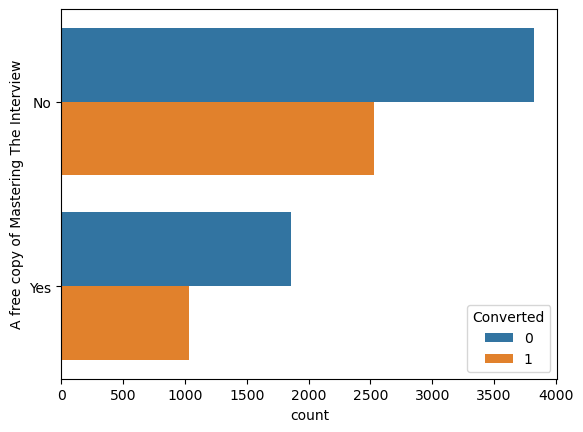

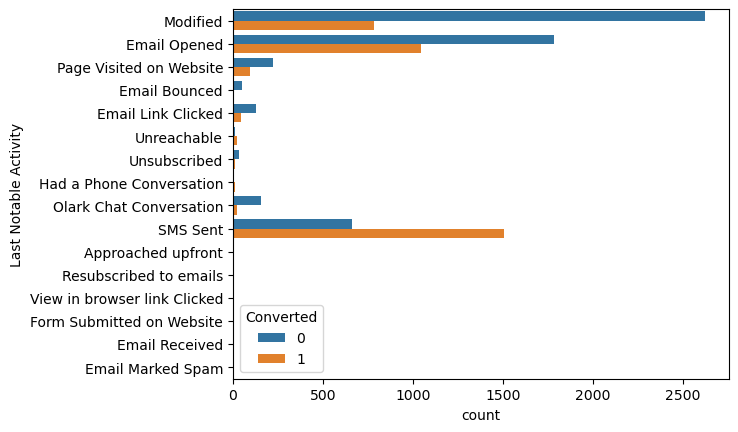

In [53]:
#categorical variable countplot with hue

for i in cat_var:
    sns.countplot(data=data, y= i, hue= "Converted")
    plt.show()

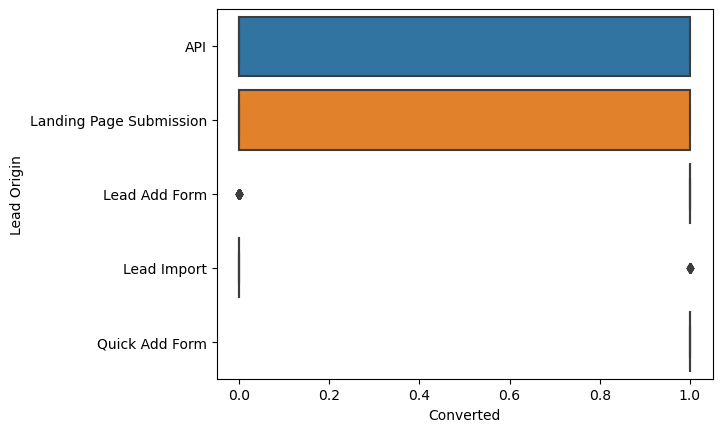

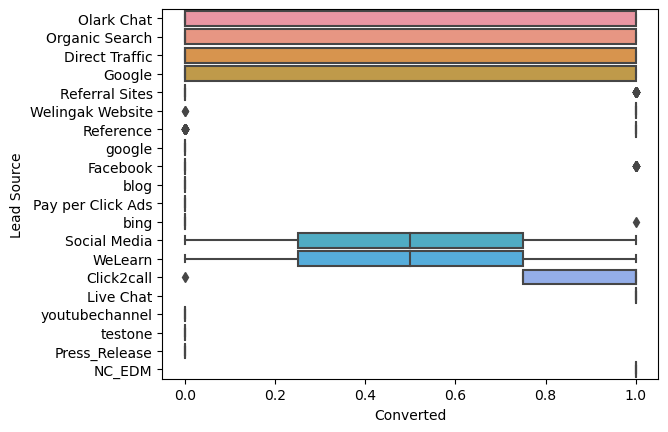

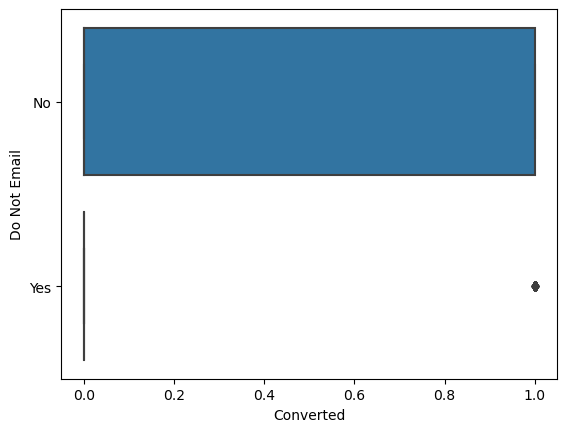

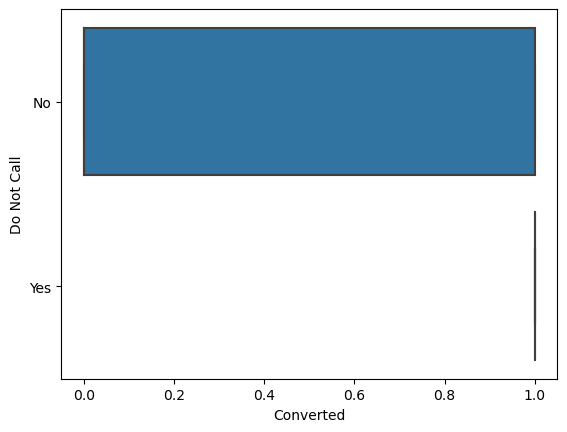

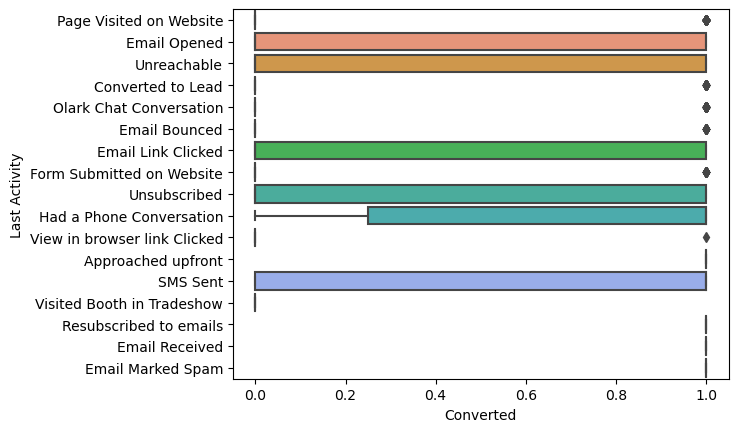

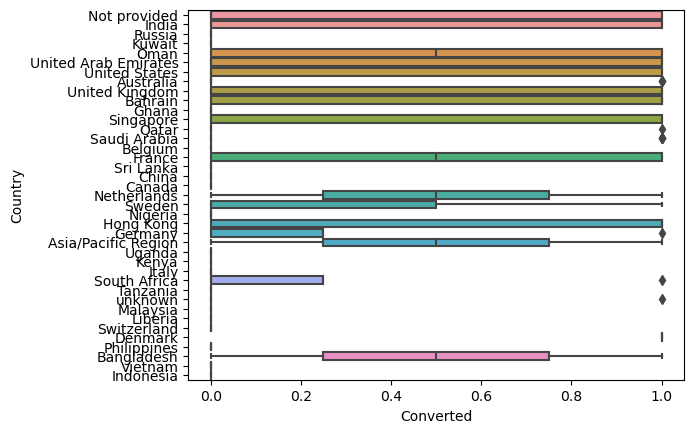

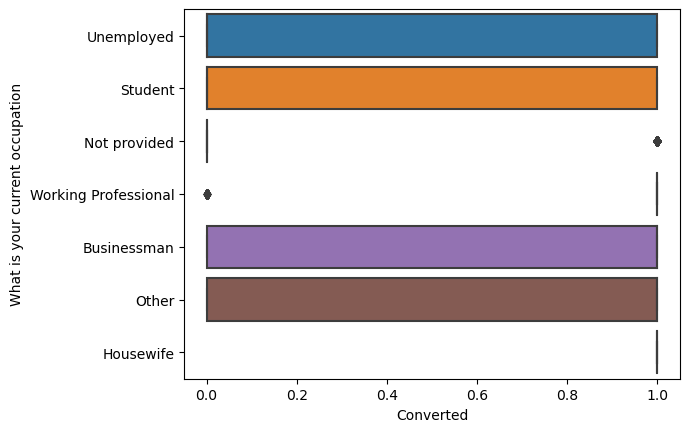

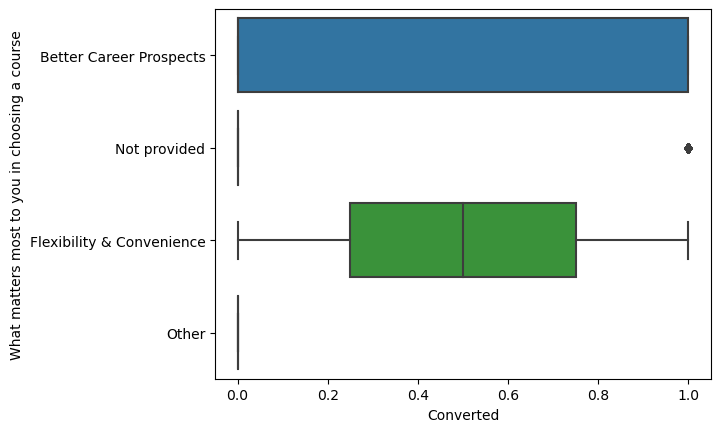

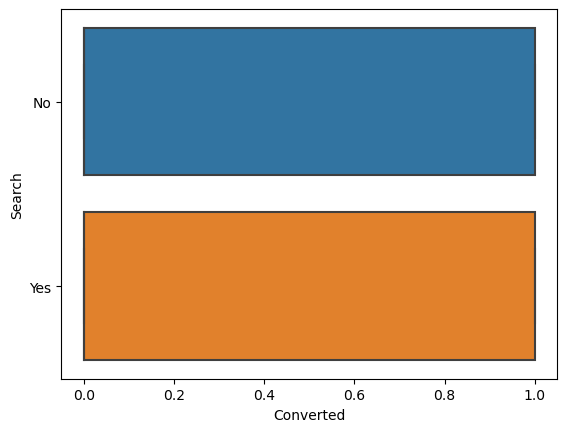

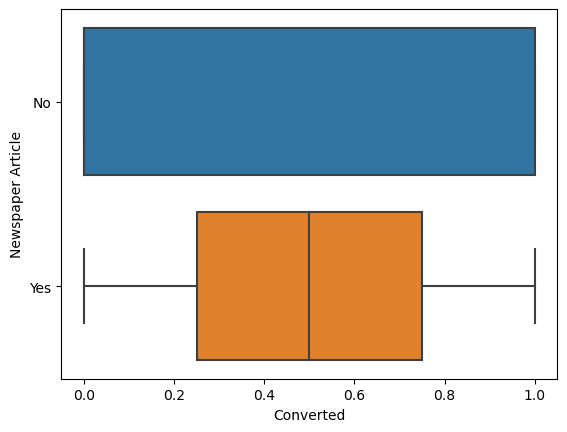

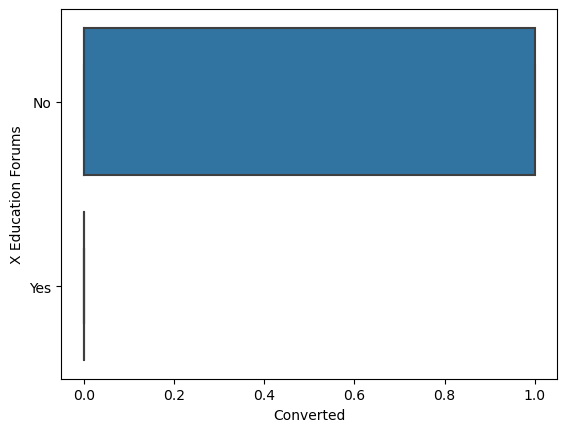

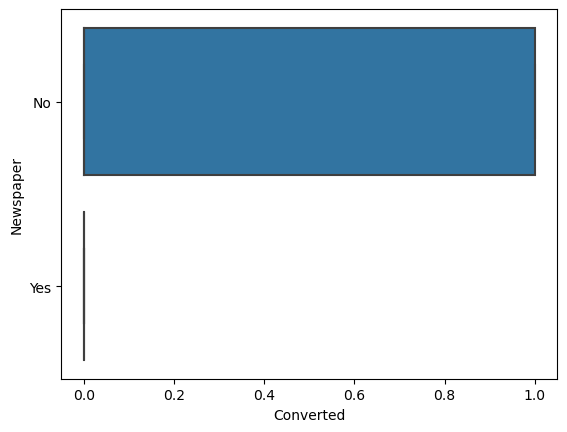

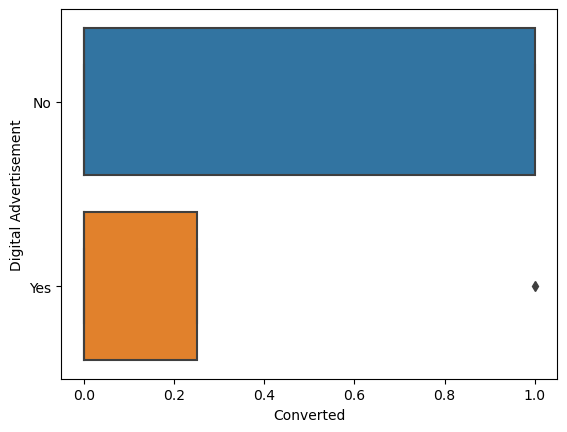

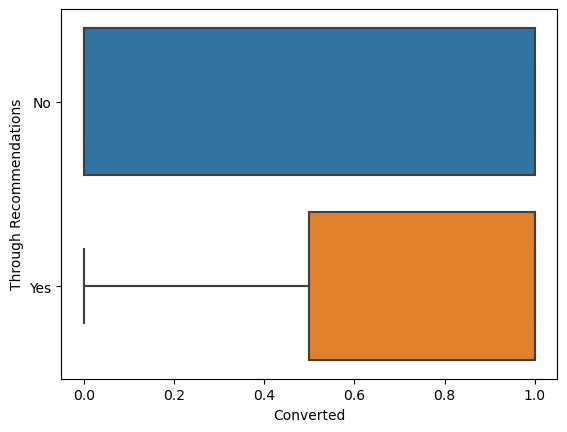

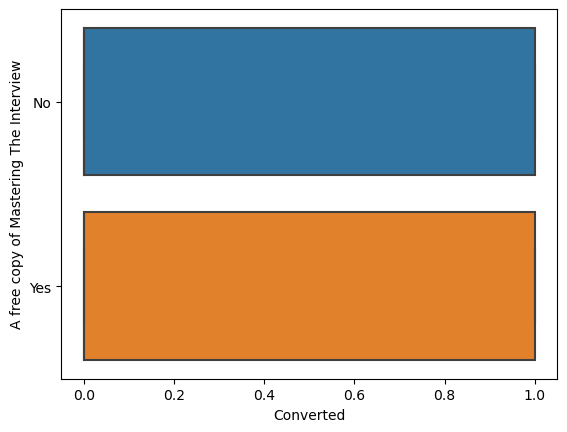

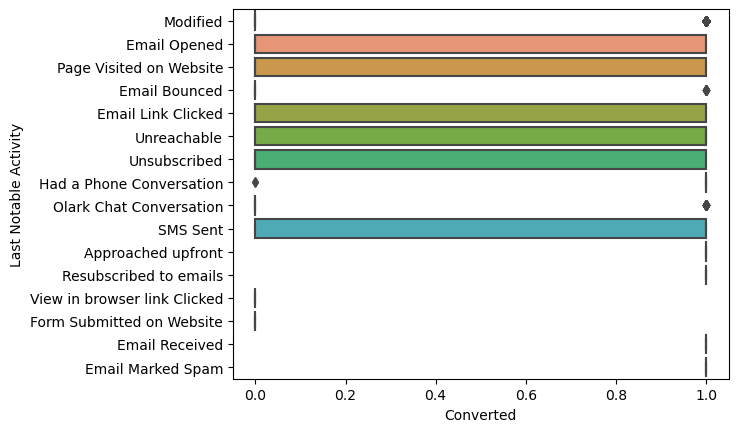

In [54]:
#categorical variable boxplot with converted

for i in cat_var:
    sns.boxplot(data=data, y= i, x="Converted")
    plt.show()

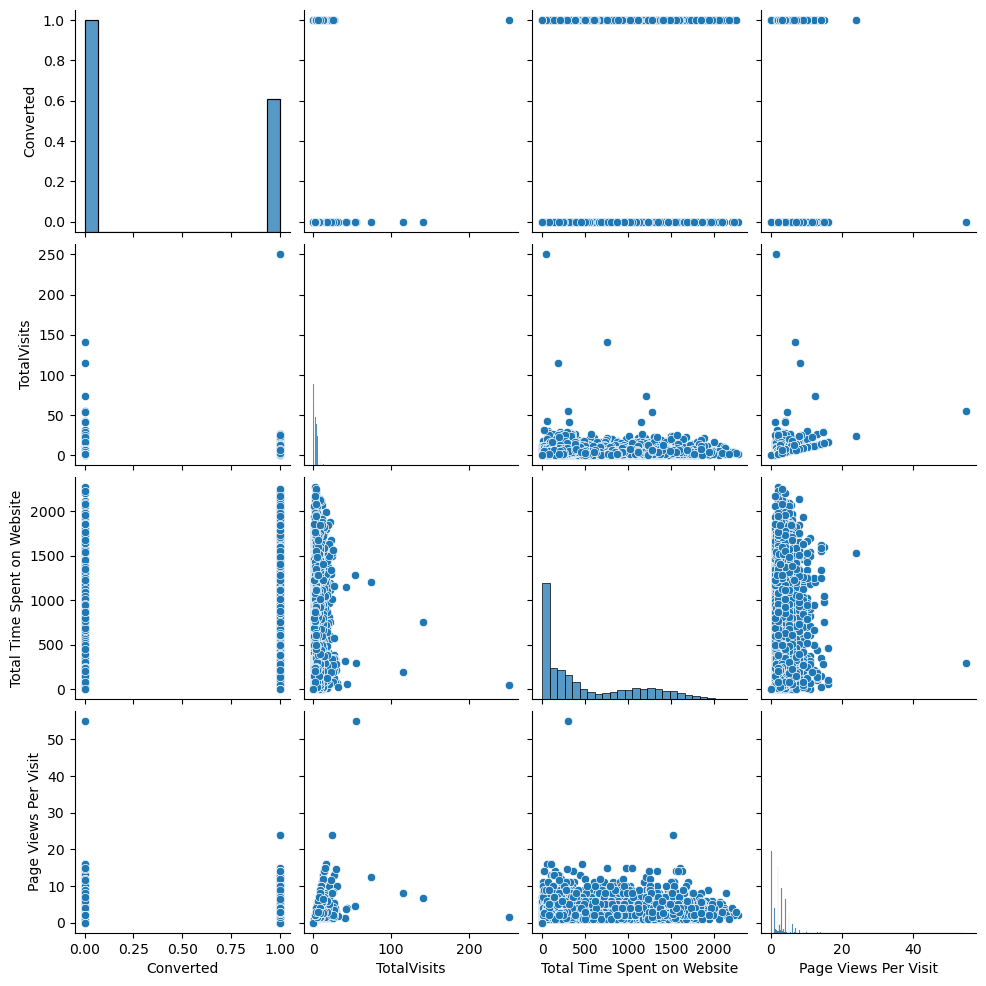

In [55]:
# pair plot for whole data
sns.pairplot(data)
plt.show()

In [56]:
#lets check corr for whole data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

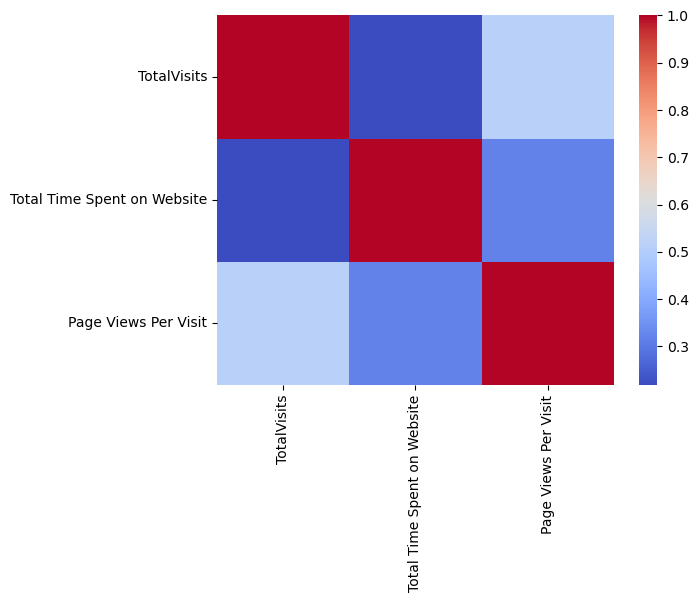

In [57]:
sns.heatmap(data[cont_var].corr(), cmap="coolwarm")
plt.show()

In [58]:
# lets add target varaible to heatmap
cont_var.append("Converted")

<Axes: >

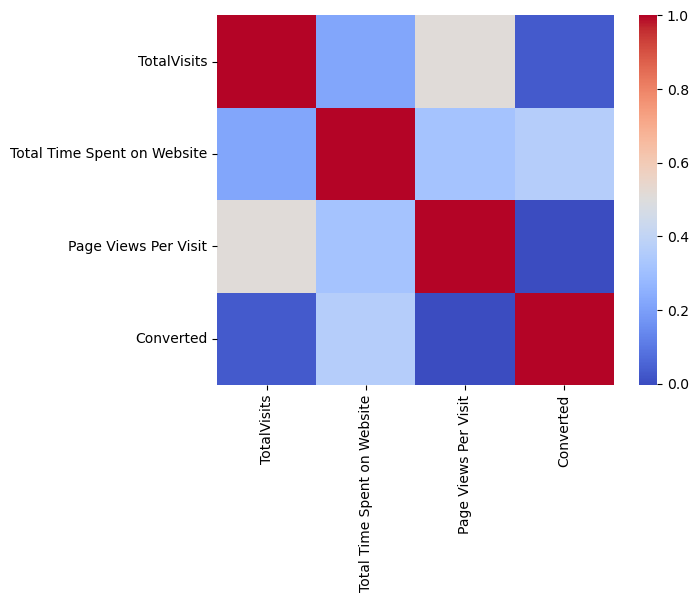

In [59]:
sns.heatmap(data[cont_var].corr(), cmap="coolwarm")

### Total visit and page views per visit have coorelation when compare to other varaiables

### since we didnt covert more categorical variables to 0,1 we cant able to see correlation, but we will use VIF to eliminate variables with high correlation.

### dummy varaible creation, 1st step for model building

In [60]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [61]:
# we have already created categorical variable list but just to make sure we will create again
var_req_dummy=[]
for i in data:
    if data[i].dtype=="object":
        var_req_dummy.append(i)
            
        

In [62]:
len(var_req_dummy)

16

In [63]:
len(cat_var)

16

In [64]:
var_req_dummy

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### lets create dummy variables

In [65]:
# lets save all dummy variables in d

d=pd.get_dummies(data[var_req_dummy],dtype=int ,drop_first=True)

In [66]:
d

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [67]:
#lets drop all those variables from data and add d to that

data_dum = data.drop(columns=var_req_dummy, axis=1)

In [68]:
data_dum=pd.concat([data_dum,d],axis=1)

In [69]:
data_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### we will do scalling for continues varaibles and we will use minmax scaler before that we will split the data

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
train_data, test_data = train_test_split(data_dum, train_size = 0.7, random_state = 77)

In [72]:
train_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3017,1,4.0,1173,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7142,0,2.0,1103,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4064,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1703,0,3.0,37,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [73]:
train_data[cont_var]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
3017,4.0,1173,4.0,1
7142,2.0,1103,2.0,0
4064,0.0,0,0.0,0
1703,3.0,37,3.0,0
1003,0.0,0,0.0,1
...,...,...,...,...
4832,3.0,1678,3.0,1
9119,2.0,761,2.0,0
7832,4.0,1343,4.0,1
2283,2.0,1059,2.0,1


In [74]:
cont_var.remove("Converted")
cont_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [75]:
train_data[cont_var]= scaler.fit_transform(train_data[cont_var])

In [76]:
train_data[cont_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000
mean,0.013750,0.215584,0.097936
std,0.020704,0.241569,0.085649
min,0.000000,0.000000,0.000000
25%,0.003984,0.005722,0.041667
50%,0.011952,0.110695,0.083333
75%,0.019920,0.412852,0.125000
max,1.000000,1.000000,1.000000


In [77]:
y_train=train_data.pop("Converted")
x_train=train_data


In [78]:
y_train.head()

3017    1
7142    0
4064    0
1703    0
1003    1
Name: Converted, dtype: int64

In [79]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3017,0.015936,0.516285,0.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7142,0.007968,0.485475,0.083333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4064,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1703,0.011952,0.016285,0.125000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [80]:
#will import required packages

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [81]:
# lets get Logestic regression
LR = LogisticRegression()

In [82]:
rfe = RFE(LR, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [83]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 55),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 40),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Live Chat', False, 75),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 62),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 64),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 68),
 ('Lead Source_blog', False, 57),
 ('Lead Source_google', False, 43),
 ('Lead Source_testone', False, 53),
 (

In [84]:
x_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Country_Australia', 'Country_Italy', 'Country_Not provided',
       'Country_Saudi Arabia', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Not provided',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [85]:
col_for_LR = x_train.columns[rfe.support_]

In [86]:
x_train_RFE=x_train[col_for_LR]

In [87]:
x_train_RFE

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_Australia,Country_Italy,Country_Not provided,Country_Saudi Arabia,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3017,0.015936,0.516285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7142,0.007968,0.485475,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4064,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1703,0.011952,0.016285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1003,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,0.011952,0.738556,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
9119,0.007968,0.334947,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7832,0.015936,0.591109,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2283,0.007968,0.466109,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [88]:
#lets add constant to 
x_train_with_cons=sm.add_constant(x_train_RFE)

In [89]:
x_train_with_cons.shape

(6468, 21)

In [90]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()

In [91]:
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.0
Date:                Sun, 18 Feb 2024   Deviance:                       5296.1
Time:                        14:10:13   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -1.0100      0.547     -1.846      0.065      -2.082       0.062
TotalVisits                                                                 7.6945      2.119      3.631      0.000       3.541      11.848
Total Time Spent on Website                                                 4.5565      0.167     27.328      0.000       4.230       4.883
Lead Origin_Lead Add Form                                                   2.1419      0.204     10.503      0.000       1.742       2.542
Lead Origin_Lead Import                                                    -1.6013      0.462     -3.467      0.001      -2.507      -0.696
Lead Source_Welingak Website                                                2.7112      1.028      2.638      0.008       0.697       4.725
Do Not Email_Yes                                                           -1.4770      0.166     -8.896      0.000      -1.802      -1.152
Last Activity_Olark Chat Conversation                                      -1.2599      0.164     -7.701      0.000      -1.581      -0.939
Last Activity_SMS Sent                                                      1.3390      0.074     18.081      0.000       1.194       1.484
Country_Australia                                                          -2.0765      1.381     -1.503      0.133      -4.784       0.631
Country_Italy                                                             -23.7646   2.56e+04     -0.001      0.999   -5.02e+04    5.01e+04
Country_Not provided                                                        1.4980      0.112     13.359      0.000       1.278       1.718
Country_Saudi Arabia                                                       -1.3289      0.901     -1.476      0.140      -3.094       0.436
What is your current occupation_Housewife                                  21.4214   1.55e+04      0.001      0.999   -3.03e+04    3.03e+04
What is your current occupation_Student                                    -1.2827      0.575     -2.230      0.026      -2.410      -0.155
What is your current occupation_Unemployed                                 -1.2852      0.543     -2.366      0.018      -2.350      -0.220
What is your current occupation_Working Professional                        1.2645      0.567      2.229      0.026       0.153       2.376
What matters most to you in choosing a course_Flexibility & Convenience   -27.1235   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_Not provided                 -2.4749      0.545     -4.539      0.000      -3.544      -1.406
Las

In [92]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,206.90
15,What is your current occupation_Unemployed,48.90
18,What matters most to you in choosing a course_...,42.13
16,What is your current occupation_Working Profes...,14.82
14,What is your current occupation_Student,5.44
11,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.73
2,Total Time Spent on Website,1.29
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Welingak Website,1.23


### we can see some with more P-value and VIF also high lets remove high VIF first

In [93]:
# lets drop What is your current occupation_Unemployed since it has more VIF

x_train_with_cons=x_train_with_cons.drop(columns="What is your current occupation_Unemployed", axis=1)

In [94]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.2
Date:                Sun, 18 Feb 2024   Deviance:                       5302.3
Time:                        14:10:13   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.2882      0.084    -27.187      0.000      -2.453      -2.123
TotalVisits                                                                 7.6655      2.023      3.789      0.000       3.701      11.630
Total Time Spent on Website                                                 4.5692      0.167     27.417      0.000       4.243       4.896
Lead Origin_Lead Add Form                                                   2.1429      0.204     10.511      0.000       1.743       2.543
Lead Origin_Lead Import                                                    -1.6046      0.462     -3.473      0.001      -2.510      -0.699
Lead Source_Welingak Website                                                2.7052      1.028      2.633      0.008       0.691       4.719
Do Not Email_Yes                                                           -1.4869      0.165     -8.992      0.000      -1.811      -1.163
Last Activity_Olark Chat Conversation                                      -1.2502      0.163     -7.657      0.000      -1.570      -0.930
Last Activity_SMS Sent                                                      1.3340      0.074     18.024      0.000       1.189       1.479
Country_Australia                                                          -2.0710      1.378     -1.503      0.133      -4.772       0.630
Country_Italy                                                             -23.7721   2.55e+04     -0.001      0.999   -5.01e+04       5e+04
Country_Not provided                                                        1.4990      0.112     13.421      0.000       1.280       1.718
Country_Saudi Arabia                                                       -1.3322      0.902     -1.478      0.140      -3.099       0.435
What is your current occupation_Housewife                                  22.6982   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Student                                    -0.0284      0.210     -0.135      0.892      -0.441       0.384
What is your current occupation_Working Professional                        2.5212      0.187     13.452      0.000       2.154       2.889
What matters most to you in choosing a course_Flexibility & Convenience   -27.1053   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_Not provided                 -1.2055      0.087    -13.891      0.000      -1.376      -1.035
Last Notable Activity_Had a Phone Conversation                              3.5707      1.124      3.176      0.001       1.367       5.774
Las

In [95]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.19
11,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.73
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Welingak Website,1.23
1,TotalVisits,1.15
17,What matters most to you in choosing a course_...,1.14
15,What is your current occupation_Working Profes...,1.11
8,Last Activity_SMS Sent,1.09


In [96]:
# lets drop Country_Italy since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="Country_Italy", axis=1)

In [97]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.8
Date:                Sun, 18 Feb 2024   Deviance:                       5307.7
Time:                        14:10:13   Pearson chi2:                 6.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.2859      0.084    -27.173      0.000      -2.451      -2.121
TotalVisits                                                                 7.6979      2.024      3.804      0.000       3.732      11.664
Total Time Spent on Website                                                 4.5585      0.166     27.389      0.000       4.232       4.885
Lead Origin_Lead Add Form                                                   2.1432      0.204     10.514      0.000       1.744       2.543
Lead Origin_Lead Import                                                    -1.6028      0.462     -3.471      0.001      -2.508      -0.698
Lead Source_Welingak Website                                                2.7051      1.028      2.633      0.008       0.691       4.719
Do Not Email_Yes                                                           -1.4849      0.165     -8.983      0.000      -1.809      -1.161
Last Activity_Olark Chat Conversation                                      -1.2506      0.163     -7.661      0.000      -1.571      -0.931
Last Activity_SMS Sent                                                      1.3301      0.074     17.986      0.000       1.185       1.475
Country_Australia                                                          -2.0695      1.378     -1.502      0.133      -4.770       0.631
Country_Not provided                                                        1.4976      0.112     13.415      0.000       1.279       1.716
Country_Saudi Arabia                                                       -1.3286      0.901     -1.474      0.140      -3.095       0.438
What is your current occupation_Housewife                                  22.6966   1.54e+04      0.001      0.999   -3.03e+04    3.03e+04
What is your current occupation_Student                                    -0.0278      0.210     -0.132      0.895      -0.440       0.384
What is your current occupation_Working Professional                        2.5217      0.187     13.459      0.000       2.154       2.889
What matters most to you in choosing a course_Flexibility & Convenience   -27.1061   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What matters most to you in choosing a course_Not provided                 -1.2045      0.087    -13.889      0.000      -1.374      -1.034
Last Notable Activity_Had a Phone Conversation                              3.5687      1.124      3.174      0.002       1.365       5.772
Last Notable Activity_Unreachable                                           2.3590      0.699      3.375      0.001       0.989       3.729
===

In [98]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.19
10,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.73
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Welingak Website,1.23
1,TotalVisits,1.15
16,What matters most to you in choosing a course_...,1.14
14,What is your current occupation_Working Profes...,1.11
8,Last Activity_SMS Sent,1.09


In [99]:
# lets drop What is your current occupation_Housewife since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="What is your current occupation_Housewife", axis=1)

In [100]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.0
Date:                Sun, 18 Feb 2024   Deviance:                       5316.0
Time:                        14:10:13   Pearson chi2:                 6.65e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.2773      0.084    -27.142      0.000      -2.442      -2.113
TotalVisits                                                                 7.6467      2.020      3.785      0.000       3.687      11.607
Total Time Spent on Website                                                 4.5522      0.166     27.398      0.000       4.227       4.878
Lead Origin_Lead Add Form                                                   2.1781      0.203     10.704      0.000       1.779       2.577
Lead Origin_Lead Import                                                    -1.5990      0.462     -3.464      0.001      -2.504      -0.694
Lead Source_Welingak Website                                                2.6726      1.028      2.601      0.009       0.659       4.687
Do Not Email_Yes                                                           -1.4890      0.165     -9.002      0.000      -1.813      -1.165
Last Activity_Olark Chat Conversation                                      -1.2517      0.163     -7.668      0.000      -1.572      -0.932
Last Activity_SMS Sent                                                      1.3249      0.074     17.928      0.000       1.180       1.470
Country_Australia                                                          -2.0706      1.377     -1.504      0.133      -4.770       0.628
Country_Not provided                                                        1.4891      0.111     13.368      0.000       1.271       1.707
Country_Saudi Arabia                                                       -1.3297      0.901     -1.476      0.140      -3.096       0.436
What is your current occupation_Student                                    -0.0334      0.210     -0.159      0.874      -0.446       0.379
What is your current occupation_Working Professional                        2.5166      0.187     13.432      0.000       2.149       2.884
What matters most to you in choosing a course_Flexibility & Convenience   -25.1346   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
What matters most to you in choosing a course_Not provided                 -1.2062      0.087    -13.916      0.000      -1.376      -1.036
Last Notable Activity_Had a Phone Conversation                              3.5624      1.124      3.169      0.002       1.359       5.766
Last Notable Activity_Unreachable                                           2.3533      0.699      3.367      0.001       0.983       3.723
===========================================================================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.19
10,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.72
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Welingak Website,1.23
1,TotalVisits,1.15
15,What matters most to you in choosing a course_...,1.14
13,What is your current occupation_Working Profes...,1.11
8,Last Activity_SMS Sent,1.09


In [102]:
# lets drop What matters most to you in choosing a course_Flexibility & Convenience since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="What matters most to you in choosing a course_Flexibility & Convenience", axis=1)

In [103]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Sun, 18 Feb 2024   Deviance:                       5325.1
Time:                        14:10:13   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3994
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2740      0.084    -27.134      0.000      -2.438      -2.110
TotalVisits                                                    7.5904      2.017      3.763      0.000       3.637      11.544
Total Time Spent on Website                                    4.5483      0.166     27.395      0.000       4.223       4.874
Lead Origin_Lead Add Form                                      2.1452      0.202     10.642      0.000       1.750       2.540
Lead Origin_Lead Import                                       -1.5964      0.461     -3.461      0.001      -2.500      -0.692
Lead Source_Welingak Website                                   2.7042      1.027      2.633      0.008       0.691       4.717
Do Not Email_Yes                                              -1.4844      0.165     -8.994      0.000      -1.808      -1.161
Last Activity_Olark Chat Conversation                         -1.2499      0.163     -7.664      0.000      -1.570      -0.930
Last Activity_SMS Sent                                         1.3257      0.074     17.953      0.000       1.181       1.470
Country_Australia                                             -2.0583      1.370     -1.503      0.133      -4.743       0.627
Country_Not provided                                           1.4859      0.111     13.349      0.000       1.268       1.704
Country_Saudi Arabia                                          -1.3312      0.901     -1.478      0.139      -3.097       0.434
What is your current occupation_Student                       -0.0317      0.210     -0.151      0.880      -0.443       0.380
What is your current occupation_Working Professional           2.4837      0.186     13.387      0.000       2.120       2.847
What matters most to you in choosing a course_Not provided    -1.2072      0.087    -13.930      0.000      -1.377      -1.037
Last Notable Activity_Had a Phone Conversation                 3.5614      1.124      3.168      0.002       1.358       5.765
Last Notable Activity_Unreachable                              2.3532      0.699      3.369      0.001       0.984       3.722
==============================================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.19
10,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.72
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.28
5,Lead Source_Welingak Website,1.23
1,TotalVisits,1.15
14,What matters most to you in choosing a course_...,1.14
13,What is your current occupation_Working Profes...,1.10
8,Last Activity_SMS Sent,1.09


In [105]:
# lets drop What is your current occupation_Student since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="What is your current occupation_Student", axis=1)

In [106]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.6
Date:                Sun, 18 Feb 2024   Deviance:                       5325.1
Time:                        14:10:13   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3994
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2754      0.083    -27.304      0.000      -2.439      -2.112
TotalVisits                                                    7.5957      2.017      3.765      0.000       3.642      11.549
Total Time Spent on Website                                    4.5482      0.166     27.395      0.000       4.223       4.874
Lead Origin_Lead Add Form                                      2.1446      0.202     10.642      0.000       1.750       2.540
Lead Origin_Lead Import                                       -1.5951      0.461     -3.459      0.001      -2.499      -0.691
Lead Source_Welingak Website                                   2.7062      1.027      2.635      0.008       0.693       4.719
Do Not Email_Yes                                              -1.4841      0.165     -8.994      0.000      -1.808      -1.161
Last Activity_Olark Chat Conversation                         -1.2501      0.163     -7.666      0.000      -1.570      -0.930
Last Activity_SMS Sent                                         1.3264      0.074     18.005      0.000       1.182       1.471
Country_Australia                                             -2.0579      1.370     -1.502      0.133      -4.743       0.627
Country_Not provided                                           1.4854      0.111     13.351      0.000       1.267       1.703
Country_Saudi Arabia                                          -1.3345      0.900     -1.483      0.138      -3.099       0.430
What is your current occupation_Working Professional           2.4849      0.185     13.405      0.000       2.122       2.848
What matters most to you in choosing a course_Not provided    -1.2062      0.086    -13.961      0.000      -1.376      -1.037
Last Notable Activity_Had a Phone Conversation                 3.5623      1.124      3.169      0.002       1.359       5.765
Last Notable Activity_Unreachable                              2.3543      0.698      3.370      0.001       0.985       3.723
==============================================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.10
10,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.72
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.27
5,Lead Source_Welingak Website,1.22
1,TotalVisits,1.15
13,What matters most to you in choosing a course_...,1.13
12,What is your current occupation_Working Profes...,1.10
8,Last Activity_SMS Sent,1.09


In [108]:
# lets drop Country_Saudi Arabia since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="Country_Saudi Arabia", axis=1)

In [109]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.8
Date:                Sun, 18 Feb 2024   Deviance:                       5327.7
Time:                        14:10:13   Pearson chi2:                 6.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2771      0.083    -27.335      0.000      -2.440      -2.114
TotalVisits                                                    7.6334      2.018      3.783      0.000       3.678      11.589
Total Time Spent on Website                                    4.5418      0.166     27.390      0.000       4.217       4.867
Lead Origin_Lead Add Form                                      2.1457      0.202     10.647      0.000       1.751       2.541
Lead Origin_Lead Import                                       -1.5945      0.461     -3.458      0.001      -2.498      -0.691
Lead Source_Welingak Website                                   2.7067      1.027      2.635      0.008       0.694       4.720
Do Not Email_Yes                                              -1.4907      0.165     -9.029      0.000      -1.814      -1.167
Last Activity_Olark Chat Conversation                         -1.2497      0.163     -7.665      0.000      -1.569      -0.930
Last Activity_SMS Sent                                         1.3264      0.074     18.011      0.000       1.182       1.471
Country_Australia                                             -2.0552      1.370     -1.500      0.134      -4.741       0.630
Country_Not provided                                           1.4871      0.111     13.369      0.000       1.269       1.705
What is your current occupation_Working Professional           2.4876      0.185     13.420      0.000       2.124       2.851
What matters most to you in choosing a course_Not provided    -1.2054      0.086    -13.956      0.000      -1.375      -1.036
Last Notable Activity_Had a Phone Conversation                 3.5638      1.124      3.171      0.002       1.361       5.767
Last Notable Activity_Unreachable                              2.3564      0.699      3.374      0.001       0.987       3.725
==============================================================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.09
10,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.72
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.27
5,Lead Source_Welingak Website,1.22
1,TotalVisits,1.15
12,What matters most to you in choosing a course_...,1.13
11,What is your current occupation_Working Profes...,1.10
8,Last Activity_SMS Sent,1.09


In [111]:
# lets drop Country_Australia since it has more p-value

x_train_with_cons=x_train_with_cons.drop(columns="Country_Australia", axis=1)

In [112]:
model = sm.GLM(y_train, x_train_with_cons, family = sm.families.Binomial())
LRmodel=model.fit()
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.4
Date:                Sun, 18 Feb 2024   Deviance:                       5330.8
Time:                        14:10:13   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.2794      0.083    -27.364      0.000      -2.443      -2.116
TotalVisits                                                    7.6024      2.016      3.771      0.000       3.651      11.554
Total Time Spent on Website                                    4.5442      0.166     27.411      0.000       4.219       4.869
Lead Origin_Lead Add Form                                      2.1464      0.202     10.650      0.000       1.751       2.541
Lead Origin_Lead Import                                       -1.5943      0.461     -3.458      0.001      -2.498      -0.691
Lead Source_Welingak Website                                   2.7066      1.027      2.635      0.008       0.694       4.720
Do Not Email_Yes                                              -1.4951      0.165     -9.061      0.000      -1.819      -1.172
Last Activity_Olark Chat Conversation                         -1.2487      0.163     -7.660      0.000      -1.568      -0.929
Last Activity_SMS Sent                                         1.3259      0.074     18.014      0.000       1.182       1.470
Country_Not provided                                           1.4897      0.111     13.394      0.000       1.272       1.708
What is your current occupation_Working Professional           2.4809      0.185     13.399      0.000       2.118       2.844
What matters most to you in choosing a course_Not provided    -1.2059      0.086    -13.966      0.000      -1.375      -1.037
Last Notable Activity_Had a Phone Conversation                 3.5666      1.124      3.173      0.002       1.364       5.770
Last Notable Activity_Unreachable                              2.3589      0.699      3.377      0.001       0.990       3.728
==============================================================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = x_train_with_cons.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_cons.values, i) for i in range(x_train_with_cons.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.09
9,Country_Not provided,1.95
3,Lead Origin_Lead Add Form,1.72
2,Total Time Spent on Website,1.28
7,Last Activity_Olark Chat Conversation,1.27
5,Lead Source_Welingak Website,1.22
1,TotalVisits,1.15
11,What matters most to you in choosing a course_...,1.13
10,What is your current occupation_Working Profes...,1.10
8,Last Activity_SMS Sent,1.09


### we have managed to control VIF and P-value for all variables, lets evaluate model before that lets generated predicted y train values 

In [114]:
# importing metrics to evaluate model
from sklearn import metrics

In [115]:
y_train_pred=LRmodel.predict(x_train_with_cons)

In [116]:
# since it is not in DF shape we will reshape it 
y_train_pred.shape

(6468,)

In [117]:
y_train_pred=y_train_pred.values.reshape(-1)

In [118]:
y_train_pred.shape

(6468,)

In [119]:
# lets create a table and cross check how our model predicted converted by keeping one cutoff value as 0.5 
y_train_pred_data=pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_data.head(20)

,Converted,Converted_Prob
0,1,0.265409
1,0,0.454644
2,0,0.119671
3,0,0.034877
4,1,0.312238
5,0,0.754338
6,0,0.066265
7,1,0.906853
8,0,0.009540
9,0,0.826007


In [120]:
y_train_pred_data['Predicted'] = y_train_pred_data.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_data.head()

,Converted,Converted_Prob,Predicted
0,1,0.265409,0
1,0,0.454644,0
2,0,0.119671,0
3,0,0.034877,0
4,1,0.312238,0


### Confusion matrix and we will calculate sensitivity (TP/TP+FN), Specificity (TN/TN+FP)

In [121]:
confusion_mat = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data.Predicted )
confusion_mat

array([[3513,  463],
       [ 755, 1737]], dtype=int64)

In [122]:
# lets create for variables to do sensitivity specificity

tp=confusion_mat[1,1]
tn=confusion_mat[0,0]
fn=confusion_mat[1,0]
fp=confusion_mat[0,1]

In [123]:
# sensitivity
tp/(tp+fn)

0.6970304975922953

In [124]:
# specificity
tn/(tn+fp)

0.8835513078470825

In [125]:
metrics.accuracy_score(y_train_pred_data.Converted, y_train_pred_data.Predicted)

0.8116883116883117

### opps I forgot to do ROC curve lets spend some time in ROC curve and see what is the optimal cutoff

But for now by keeping 0.5 as cut off we got accuracy score 80%, sensitivity as 69.7%, and specificity as 88%

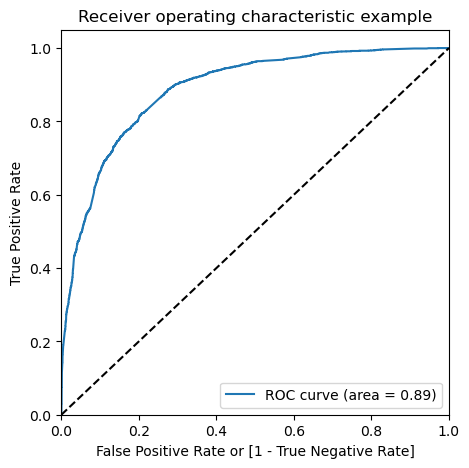

In [126]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_data.Converted, y_train_pred_data.Converted_Prob)

### ROC curve looks good

In [127]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_data[i]= y_train_pred_data.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_data.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.265409,0,1,1,1,0,0,0,0,0,0,0
1,0,0.454644,0,1,1,1,1,1,0,0,0,0,0
2,0,0.119671,0,1,1,0,0,0,0,0,0,0,0
3,0,0.034877,0,1,0,0,0,0,0,0,0,0,0
4,1,0.312238,0,1,1,1,1,0,0,0,0,0,0


In [128]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385281,1.000000,0.000000
0.1,0.1,0.582715,0.985955,0.329980
0.2,0.2,0.764533,0.913323,0.671278
0.3,0.3,0.789116,0.872793,0.736670
0.4,0.4,0.811688,0.769663,0.838028
0.5,0.5,0.811688,0.697030,0.883551
0.6,0.6,0.802721,0.630417,0.910714
0.7,0.7,0.779685,0.519663,0.942656
0.8,0.8,0.747526,0.392055,0.970322
0.9,0.9,0.710111,0.267255,0.987676


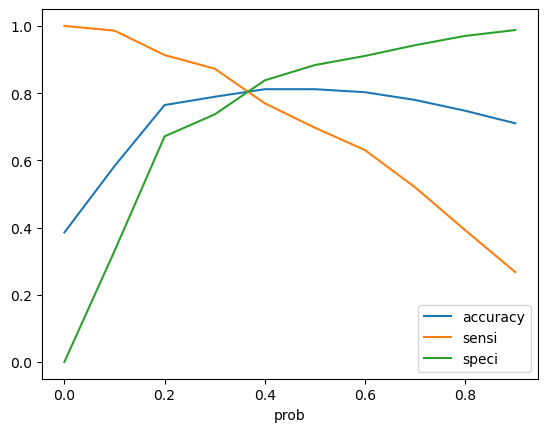

In [129]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### it looks like 0.37 is the ideal cutoff

In [130]:
y_train_pred_data['Ideal_cutoff_Predicted'] = y_train_pred_data.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_data.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Ideal_cutoff_Predicted
0,1,0.265409,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.454644,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.119671,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.034877,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.312238,0,1,1,1,1,0,0,0,0,0,0,0


In [131]:
confusion_mat_2 = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data.Ideal_cutoff_Predicted )
confusion_mat_2

array([[3256,  720],
       [ 531, 1961]], dtype=int64)

In [132]:
tp=confusion_mat_2[1,1]
tn=confusion_mat_2[0,0]
fn=confusion_mat_2[1,0]
fp=confusion_mat_2[0,1]

In [133]:
# sensitivity
tp/(tp+fn)

0.7869181380417335

In [134]:
# specificity
tn/(tn+fp)

0.8189134808853119

In [135]:
metrics.accuracy_score(y_train_pred_data.Converted, y_train_pred_data.Ideal_cutoff_Predicted)

0.8065862708719852

### with cutoff 0.37 we have Sensi 70%, Specificity 88%, and Accuracy 80%

### we can try prediction and recall now

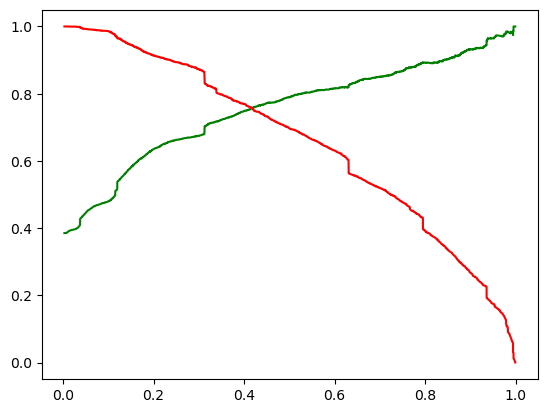

In [136]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_data.Converted, y_train_pred_data.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [137]:
# Precision = 
tp / (tp + fp)

0.7314434912346139

In [138]:
#Recall = TP / TP + FN
tp / (tp + fn)

0.7869181380417335

### we came to know Precision is around 73% and recall around 78 percent
### lets do the same for test set

In [139]:
test_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2832,0,4.0,444,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4985,0,5.0,401,5.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4187,1,4.0,765,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
92,0,4.0,101,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [140]:
test_data[cont_var]= scaler.transform(test_data[cont_var])

In [141]:
test_data[cont_var].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2832,0.015936,0.195423,0.166667
4985,0.019920,0.176496,0.208333
4187,0.015936,0.336708,0.166667
92,0.015936,0.044454,0.166667
6811,0.007968,0.623239,0.041667


In [142]:
y_test=test_data.pop("Converted")

In [143]:
y_test.head()

2832    0
4985    0
4187    1
92      0
6811    1
Name: Converted, dtype: int64

In [144]:
x_test=test_data

In [145]:
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Not provided,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not provided,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2832,0.015936,0.195423,0.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4985,0.019920,0.176496,0.208333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4187,0.015936,0.336708,0.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
92,0.015936,0.044454,0.166667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [146]:
x_test.shape

(2772, 113)

In [147]:
final_col_list=list(x_train_with_cons.columns)

In [148]:
final_col_list

['const',
 'TotalVisits',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Country_Not provided',
 'What is your current occupation_Working Professional',
 'What matters most to you in choosing a course_Not provided',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Unreachable']

In [149]:
x_test_with_cons=sm.add_constant(x_test)

In [150]:
x_test_with_cons=x_test_with_cons[final_col_list]

In [151]:
x_test_with_cons.shape

(2772, 14)

In [152]:
y_test_pred=LRmodel.predict(x_test_with_cons)

In [153]:
y_test_pred.shape

(2772,)

In [154]:
y_test_pred=y_test_pred.values.reshape(-1)

In [155]:
y_test_pred.shape

(2772,)

In [156]:
y_test_pred_data=pd.DataFrame({'Converted':y_train.values, 'Predicted_prob':y_train_pred})
y_test_pred_data.head(20)

,Converted,Predicted_prob
0,1,0.265409
1,0,0.454644
2,0,0.119671
3,0,0.034877
4,1,0.312238
5,0,0.754338
6,0,0.066265
7,1,0.906853
8,0,0.009540
9,0,0.826007


In [157]:
y_test_pred_data['Predicted'] = y_test_pred_data.Predicted_prob.map(lambda x: 1 if x > 0.37 else 0)
y_test_pred_data.head()

,Converted,Predicted_prob,Predicted
0,1,0.265409,0
1,0,0.454644,1
2,0,0.119671,0
3,0,0.034877,0
4,1,0.312238,0


In [158]:
confusion_mat = metrics.confusion_matrix(y_test_pred_data.Converted, y_test_pred_data.Predicted)
confusion_mat

array([[3256,  720],
       [ 531, 1961]], dtype=int64)

In [159]:
tp=confusion_mat[1,1]
tn=confusion_mat[0,0]
fn=confusion_mat[1,0]
fp=confusion_mat[0,1]

In [160]:
# sensitivity
tp/(tp+fn)

0.7869181380417335

In [161]:
# specificity
tn/(tn+fp)

0.8189134808853119

In [162]:
metrics.accuracy_score(y_test_pred_data.Converted, y_test_pred_data.Predicted)

0.8065862708719852

In [163]:
# Precision = 
tp / (tp + fp)

0.7314434912346139

In [164]:
#Recall = TP / TP + FN
tp / (tp + fn)

0.7869181380417335

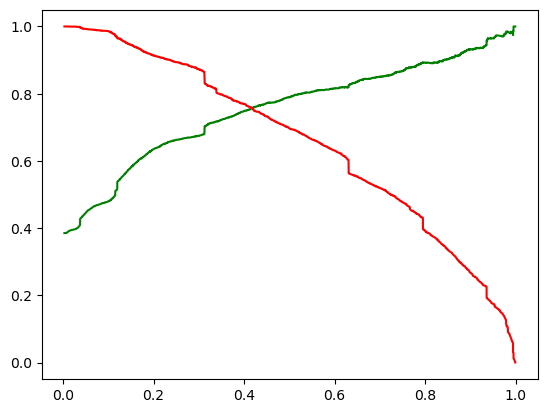

In [165]:
p, r, thresholds = precision_recall_curve(y_test_pred_data.Converted, y_test_pred_data.Predicted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### for test date:

Accuracy = 80%
Sensi = 78%
Specificity = 81%
precision = 73%
recall = 78%

In [169]:
for i in x_test_with_cons:
    print(i)

const
TotalVisits
Total Time Spent on Website
Lead Origin_Lead Add Form
Lead Origin_Lead Import
Lead Source_Welingak Website
Do Not Email_Yes
Last Activity_Olark Chat Conversation
Last Activity_SMS Sent
Country_Not provided
What is your current occupation_Working Professional
What matters most to you in choosing a course_Not provided
Last Notable Activity_Had a Phone Conversation
Last Notable Activity_Unreachable


# Summary

below are the list of variables which are important for our model:

TotalVisits

Total Time Spent on Website

Lead Origin_Lead Add Form

Lead Origin_Lead Import

Lead Source_Welingak Website

Do Not Email_Yes

Last Activity_Olark Chat Conversation

Last Activity_SMS Sent

Country_Not provided

What is your current occupation_Working Professional

What matters most to you in choosing a course_Not provided

Last Notable Activity_Had a Phone Conversation

Last Notable Activity_Unreachable

#### Ideal cutoff = 0.37

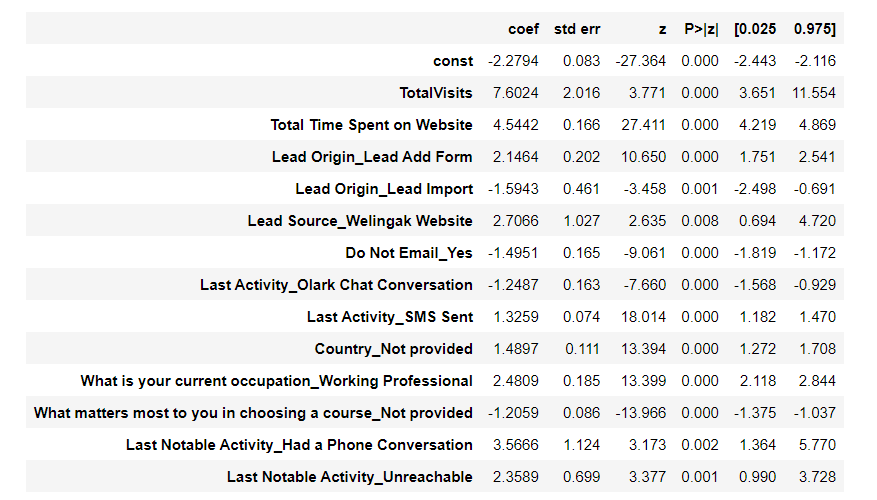